In [85]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# sklearn
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_validate
from sklearn.preprocessing import StandardScaler

# Modelos
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import  RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC  
from sklearn.tree import DecisionTreeClassifier 
from sklearn.naive_bayes import GaussianNB  
from sklearn.neural_network import MLPClassifier   
from sklearn.ensemble import AdaBoostClassifier              
from lightgbm import LGBMClassifier

# src
from src.medidas_desempeno_biclase import calcula_medidas_biclase

# Shapiro-Wilk
from scipy.stats import shapiro

# Test Mood
from scipy import stats
import matplotlib.pyplot as plt
import matplotlib.patheffects as path_effects

In [86]:
semilla = 42

ruta = 'data/Electricity_limpio.csv'
df = pd.read_csv(ruta)
df.head()

,feat_1,feat_2,feat_3,feat_4,feat_5,class
0,0.830492,0.500000,0.234043,0.143371,0.259799,1
1,0.033902,1.000000,0.553191,0.025308,0.268320,0
2,0.864394,0.000000,0.765957,0.432321,0.805719,1
3,0.118751,0.333333,0.936170,0.339449,0.552735,1
4,0.813637,0.166667,0.170213,0.010216,0.138988,0


In [87]:
X = df.drop('class', axis=1)
y = df['class']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size = .20,
    stratify = y,
    random_state = semilla)

print('===== Dimensiones =====')
print(f'X       : {X.shape}')
print(f'y       : {y.shape}')
print(f'X_train : {X_train.shape}')
print(f'y_train : {y_train.shape}')
print(f'X_test  : {X_test.shape}')
print(f'y_test  : {y_test.shape}')

===== Dimensiones =====
X       : (2400, 5)
y       : (2400,)
X_train : (1920, 5)
y_train : (1920,)
X_test  : (480, 5)
y_test  : (480,)


### Modelos

In [88]:
print('========== KNN ==========')
pipeline = Pipeline([
    ('knn', KNeighborsClassifier(metric = 'euclidean', n_neighbors = 3))
])

results = cross_validate(
    estimator = pipeline,
    X = X_train,
    y = y_train,
    cv = 5,
    scoring = ['accuracy', 'recall', 'f1'],
    n_jobs = -1,
    verbose = 1,
    return_train_score = True
)
df_KNN = pd.DataFrame(results)
df_KNN

========== KNN ==========


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.2s finished


,fit_time,score_time,test_accuracy,train_accuracy,test_recall,train_recall,test_f1,train_f1
0,0.006666,0.035730,0.835938,0.952474,0.761290,0.917874,0.789298,0.939819
1,0.008635,0.062241,0.888021,0.944661,0.877419,0.922705,0.863492,0.930950
2,0.005970,0.034912,0.888021,0.949870,0.832258,0.924316,0.857143,0.937143
3,0.008169,0.063237,0.877604,0.953776,0.812903,0.937198,0.842809,0.942510
4,0.007554,0.061480,0.882812,0.946615,0.852564,0.925806,0.855305,0.933333


In [89]:
print('========== LR ==========')
pipeline = Pipeline([
    ('log_reg', LogisticRegression(penalty = 'l2', C = 1.0))
])

results = cross_validate(
    estimator = pipeline,
    X = X_train,
    y = y_train,
    cv = 5,
    scoring = ['accuracy', 'recall', 'f1'],
    n_jobs = -1,
    verbose = 1,
    return_train_score = True
)
df_LR = pd.DataFrame(results)
df_LR

========== LR ==========


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.1s finished


,fit_time,score_time,test_accuracy,train_accuracy,test_recall,train_recall,test_f1,train_f1
0,0.018495,0.018657,0.802083,0.799479,0.645161,0.636071,0.724638,0.719490
1,0.012433,0.013123,0.815104,0.797526,0.658065,0.639291,0.741818,0.718552
2,0.017960,0.015807,0.776042,0.800130,0.600000,0.653784,0.683824,0.725648
3,0.014904,0.018125,0.786458,0.794271,0.580645,0.636071,0.687023,0.714286
4,0.016330,0.018062,0.799479,0.794922,0.679487,0.632258,0.733564,0.713376


In [90]:
print('========== RF ==========')
pipeline = Pipeline([
    ('rf', RandomForestClassifier(n_estimators = 50, max_depth = 10))
])

results = cross_validate(
    estimator = pipeline,
    X = X_train,
    y = y_train,
    cv = 5,
    scoring = ['accuracy', 'recall', 'f1'],
    n_jobs = -1,
    verbose = 1,
    return_train_score = True
)
df_RF = pd.DataFrame(results)
df_RF

========== RF ==========


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.3s finished


,fit_time,score_time,test_accuracy,train_accuracy,test_recall,train_recall,test_f1,train_f1
0,0.251966,0.021170,0.958333,0.994141,0.929032,0.988728,0.947368,0.992724
1,0.249934,0.026689,0.953125,0.996745,0.948387,0.996779,0.942308,0.995977
2,0.211861,0.021279,0.947917,0.997396,0.922581,0.993559,0.934641,0.996769
3,0.251125,0.027143,0.973958,0.998047,0.974194,0.998390,0.967949,0.997586
4,0.211885,0.028977,0.945312,0.997396,0.923077,0.995161,0.932039,0.996769


In [91]:
print('========== XGB ==========')
pipeline = Pipeline([
    ('xgb', XGBClassifier(n_estimators = 100, max_depth = 3))
])

results = cross_validate(
    estimator = pipeline,
    X = X_train,
    y = y_train,
    cv = 5,
    scoring = ['accuracy', 'recall', 'f1'],
    n_jobs = -1,
    verbose = 1,
    return_train_score = True
)
df_XGB = pd.DataFrame(results)
df_XGB

========== XGB ==========


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.2s finished


,fit_time,score_time,test_accuracy,train_accuracy,test_recall,train_recall,test_f1,train_f1
0,0.075904,0.017529,0.963542,0.992188,0.929032,0.983897,0.953642,0.990276
1,0.070339,0.015987,0.955729,0.994141,0.961290,0.990338,0.946032,0.992736
2,0.071008,0.014636,0.963542,0.991536,0.948387,0.985507,0.954545,0.989491
3,0.051520,0.014464,0.966146,0.992839,0.954839,0.985507,0.957929,0.991093
4,0.071920,0.019682,0.950521,0.992839,0.935897,0.987097,0.938907,0.991093


In [92]:
print('========== SVM ==========')
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('svm', SVC(
        C=1.0,
        kernel='rbf',
        gamma='scale'
    ))
])

results = cross_validate(
    estimator=pipeline,
    X=X_train,
    y=y_train,
    cv=5,
    scoring=['accuracy', 'recall', 'f1'],
    n_jobs=-1,
    verbose=1,
    return_train_score=True
)
df_SVM = pd.DataFrame(results)
df_SVM

========== SVM ==========


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.2s finished


,fit_time,score_time,test_accuracy,train_accuracy,test_recall,train_recall,test_f1,train_f1
0,0.084746,0.036772,0.820312,0.844401,0.729032,0.735910,0.766102,0.792715
1,0.086226,0.036415,0.835938,0.834635,0.767742,0.755233,0.790698,0.786913
2,0.083091,0.036042,0.822917,0.845052,0.709677,0.747182,0.763889,0.795883
3,0.084126,0.026141,0.820312,0.834635,0.709677,0.761675,0.761246,0.788333
4,0.079504,0.026155,0.828125,0.832031,0.730769,0.716129,0.775510,0.774869


In [93]:
print('========== DECISION TREE ==========')
pipeline = Pipeline([
    ('dt', DecisionTreeClassifier(
        max_depth=None,
        min_samples_split=2,
        min_samples_leaf=1,
        random_state=42
    ))
])

results = cross_validate(
    estimator=pipeline,
    X=X_train,
    y=y_train,
    cv=5,
    scoring=['accuracy', 'recall', 'f1'],
    n_jobs=-1,
    verbose=1,
    return_train_score=True
)
df_DT = pd.DataFrame(results)
df_DT

========== DECISION TREE ==========


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.1s finished


,fit_time,score_time,test_accuracy,train_accuracy,test_recall,train_recall,test_f1,train_f1
0,0.013580,0.017572,0.953125,1.0,0.922581,1.0,0.940789,1.0
1,0.013088,0.016954,0.955729,1.0,0.948387,1.0,0.945338,1.0
2,0.010412,0.012822,0.950521,1.0,0.954839,1.0,0.939683,1.0
3,0.012623,0.017187,0.971354,1.0,0.961290,1.0,0.964401,1.0
4,0.011025,0.012712,0.960938,1.0,0.955128,1.0,0.952077,1.0


In [94]:
print('========== NAIVE BAYES ==========')
pipeline = Pipeline([
    ('scaler', StandardScaler()), 
    ('nb', GaussianNB(
        var_smoothing=1e-9
    ))
])

results = cross_validate(
    estimator=pipeline,
    X=X_train,
    y=y_train,
    cv=5,
    scoring=['accuracy', 'recall', 'f1'],
    n_jobs=-1,
    verbose=1,
    return_train_score=True
)
df_NB = pd.DataFrame(results)
df_NB

========== NAIVE BAYES ==========


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.1s finished


,fit_time,score_time,test_accuracy,train_accuracy,test_recall,train_recall,test_f1,train_f1
0,0.011946,0.020133,0.802083,0.789714,0.638710,0.607085,0.722628,0.700093
1,0.012754,0.019104,0.809896,0.789062,0.645161,0.616747,0.732601,0.702752
2,0.009536,0.019380,0.783854,0.797526,0.612903,0.628019,0.695971,0.714940
3,0.012037,0.014125,0.781250,0.792969,0.561290,0.623188,0.674419,0.708791
4,0.011524,0.018752,0.789062,0.796224,0.641026,0.622581,0.711744,0.711521


In [95]:
print('========== MLP ==========')
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('mlp', MLPClassifier(
        hidden_layer_sizes=(100,),  
        activation='relu',
        solver='adam',
        alpha=0.0001,
        random_state=42
    ))
])

results = cross_validate(
    estimator=pipeline,
    X=X_train,
    y=y_train,
    cv=5,
    scoring=['accuracy', 'recall', 'f1'],
    n_jobs=-1,
    verbose=1,
    return_train_score=True
)
df_MLP = pd.DataFrame(results)
df_MLP

========== MLP ==========


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
/home/jair/anaconda3/envs/CIP/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/jair/anaconda3/envs/CIP/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/jair/anaconda3/envs/CIP/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/jair/anaconda3/envs/CIP/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200)

,fit_time,score_time,test_accuracy,train_accuracy,test_recall,train_recall,test_f1,train_f1
0,1.534101,0.010307,0.841146,0.851562,0.774194,0.792271,0.797342,0.811881
1,1.554006,0.009461,0.843750,0.846354,0.793548,0.780998,0.803922,0.804312
2,1.672843,0.009344,0.830729,0.854167,0.729032,0.793881,0.776632,0.814876
3,1.156502,0.010473,0.825521,0.851562,0.741935,0.784219,0.774411,0.810316
4,1.174732,0.011024,0.830729,0.845703,0.794872,0.779032,0.792332,0.802993


In [96]:
print('========== ADABOOST ==========')
pipeline = Pipeline([
    ('ab', AdaBoostClassifier(
        n_estimators=50,
        learning_rate=1.0,
        random_state=42
    ))
])

results = cross_validate(
    estimator=pipeline,
    X=X_train,
    y=y_train,
    cv=5,
    scoring=['accuracy', 'recall', 'f1'],
    n_jobs=-1,
    verbose=1,
    return_train_score=True
)
df_ABOOST = pd.DataFrame(results)
df_ABOOST

========== ADABOOST ==========


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.4s finished


,fit_time,score_time,test_accuracy,train_accuracy,test_recall,train_recall,test_f1,train_f1
0,0.298080,0.040329,0.880208,0.876302,0.877419,0.884058,0.855346,0.852484
1,0.278612,0.041940,0.869792,0.878255,0.858065,0.867955,0.841772,0.852174
2,0.286702,0.041185,0.854167,0.899089,0.806452,0.874396,0.816993,0.875101
3,0.261079,0.035086,0.880208,0.872396,0.858065,0.856683,0.852564,0.844444
4,0.263514,0.034266,0.861979,0.883464,0.852564,0.866129,0.833856,0.857143


In [97]:
print('========== LGBMClassifier ==========')
pipeline = Pipeline([
    ('lgbm', LGBMClassifier(
        n_estimators=100,
        max_depth=-1,
        learning_rate=0.1,
        random_state=42,
        verbose=-1,
        n_jobs=-1
    ))
])

results = cross_validate(
    estimator=pipeline,
    X=X_train,
    y=y_train,
    cv=5,
    scoring=['accuracy', 'recall', 'f1'],
    n_jobs=-1,
    verbose=1,
    return_train_score=True
)
df_LGBMC = pd.DataFrame(results)
df_LGBMC

========== LGBMClassifier ==========


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    2.3s finished


,fit_time,score_time,test_accuracy,train_accuracy,test_recall,train_recall,test_f1,train_f1
0,2.060064,0.017002,0.973958,1.0,0.948387,1.0,0.967105,1.0
1,2.069139,0.017476,0.955729,1.0,0.941935,1.0,0.944984,1.0
2,1.948167,0.014336,0.973958,1.0,0.961290,1.0,0.967532,1.0
3,1.930056,0.015738,0.971354,1.0,0.961290,1.0,0.964401,1.0
4,2.021671,0.017773,0.960938,1.0,0.948718,1.0,0.951768,1.0


### Shapiro - Wilk. Se puede usar un test no paramétrico?

* Si p > 0.05 → No rechazas H₀ → la distribución es normal.
* Si p ≤ 0.05 → Rechazas H₀ → la distribución NO es normal → usa pruebas no paramétricas.

In [98]:
dfs = {
    'KNN': df_KNN, 
    'LR' : df_LR,
    'RF': df_RF,
    'XGBC': df_XGB,
    'SVM': df_SVM,
    'DT': df_DT,
    'NB': df_NB,
    'MLP': df_MLP,
    'ABOOST': df_ABOOST,
    'LGBMC': df_LGBMC
}

modelos = ['KNN', 'LR', 'RF', 'XGBC', 'SVM', 'DT', 'NB', 'MLP', 'ABOOST', 'LGBMC']
medidas = ['test_accuracy', 'test_recall', 'test_f1']

for modelo in modelos:
    print(f'\n{"="*40}')
    print(f'MODELO: {modelo}')
    print("="*40)
    df = dfs[modelo]

    for medida in medidas:
        data = df[medida]
        stat, p = shapiro(data)
        print(f'\n-->{medida}')
        print(f'p value: {np.round(p, 4)}')
        if p > 0.05:
            print('Tomar Ho, SI sigue distribución Normal')
        else:
            print('Tomar H1, NO sigue distribución Normal xxxxx')


MODELO: KNN

-->test_accuracy
p value: 0.0133
Tomar H1, NO sigue distribución Normal xxxxx

-->test_recall
p value: 0.8912
Tomar Ho, SI sigue distribución Normal

-->test_f1
p value: 0.0398
Tomar H1, NO sigue distribución Normal xxxxx

MODELO: LR

-->test_accuracy
p value: 0.9276
Tomar Ho, SI sigue distribución Normal

-->test_recall
p value: 0.6584
Tomar Ho, SI sigue distribución Normal

-->test_f1
p value: 0.2013
Tomar Ho, SI sigue distribución Normal

MODELO: RF

-->test_accuracy
p value: 0.4172
Tomar Ho, SI sigue distribución Normal

-->test_recall
p value: 0.1603
Tomar Ho, SI sigue distribución Normal

-->test_f1
p value: 0.3609
Tomar Ho, SI sigue distribución Normal

MODELO: XGBC

-->test_accuracy
p value: 0.314
Tomar Ho, SI sigue distribución Normal

-->test_recall
p value: 0.7821
Tomar Ho, SI sigue distribución Normal

-->test_f1
p value: 0.5156
Tomar Ho, SI sigue distribución Normal

MODELO: SVM

-->test_accuracy
p value: 0.2073
Tomar Ho, SI sigue distribución Normal

-->test

### Preparación de los df con medidas a comparar

In [110]:
dfs = [df_KNN, df_LR, df_RF, df_XGB, df_SVM, df_DT, df_NB, df_MLP, df_ABOOST, df_LGBMC]
modelos = ['KNN', 'LR', 'RF', 'XGBC', 'SVM', 'DT', 'NB', 'MLP', 'ABOOST', 'LGBMC']

accuracys = {}
recall = {}
f1 = {}

for i, (df, modelo) in enumerate(zip(dfs, modelos), 1):
    accuracys[modelo] = df['test_accuracy'].values

for i, (df, modelo) in enumerate(zip(dfs, modelos), 1):
    recall[modelo] = df['test_recall'].values

for i, (df, modelo) in enumerate(zip(dfs, modelos), 1):
    f1[modelo] = df['test_f1'].values

df_accuracy = pd.DataFrame(accuracys)
df_recall = pd.DataFrame(recall)
df_f1 = pd.DataFrame(f1)

In [113]:
df_f1

,KNN,LR,RF,XGBC,SVM,DT,NB,MLP,ABOOST,LGBMC
0,0.789298,0.724638,0.947368,0.953642,0.766102,0.940789,0.722628,0.797342,0.855346,0.967105
1,0.863492,0.741818,0.942308,0.946032,0.790698,0.945338,0.732601,0.803922,0.841772,0.944984
2,0.857143,0.683824,0.934641,0.954545,0.763889,0.939683,0.695971,0.776632,0.816993,0.967532
3,0.842809,0.687023,0.967949,0.957929,0.761246,0.964401,0.674419,0.774411,0.852564,0.964401
4,0.855305,0.733564,0.932039,0.938907,0.775510,0.952077,0.711744,0.792332,0.833856,0.951768


### Test Mood


RESULTADOS DE LA PRUEBA:
Estadístico χ²: 40.4000
Valor p: 0.0000064297
Mediana global (umbral): 0.8789

CONCLUSIÓN ESTADÍSTICA (α = 0.05):
H₀: Todas las medianas de Accuracy son iguales.
H₁: Al menos una mediana difiere.
→ Dado que p = 0.000006 < α = 0.05, se rechaza H₀.
→ Existen diferencias estadísticamente significativas en las medianas de Accuracy entre los modelos.

MEDIANAS POR MODELO:
  KNN        0.882800 (MAYOR que la mediana global)
  LR         0.799500 (MENOR o IGUAL que la mediana global)
  RF         0.953100 (MAYOR que la mediana global)
  XGBC       0.963500 (MAYOR que la mediana global)
  SVM        0.822900 (MENOR o IGUAL que la mediana global)
  DT         0.955700 (MAYOR que la mediana global)
  NB         0.789100 (MENOR o IGUAL que la mediana global)
  MLP        0.830700 (MENOR o IGUAL que la mediana global)
  ABOOST     0.869800 (MENOR o IGUAL que la mediana global)
  LGBMC      0.971400 (MAYOR que la mediana global)

TABLA DE CONTINGENCIA (Prueba de Mood):
Fil

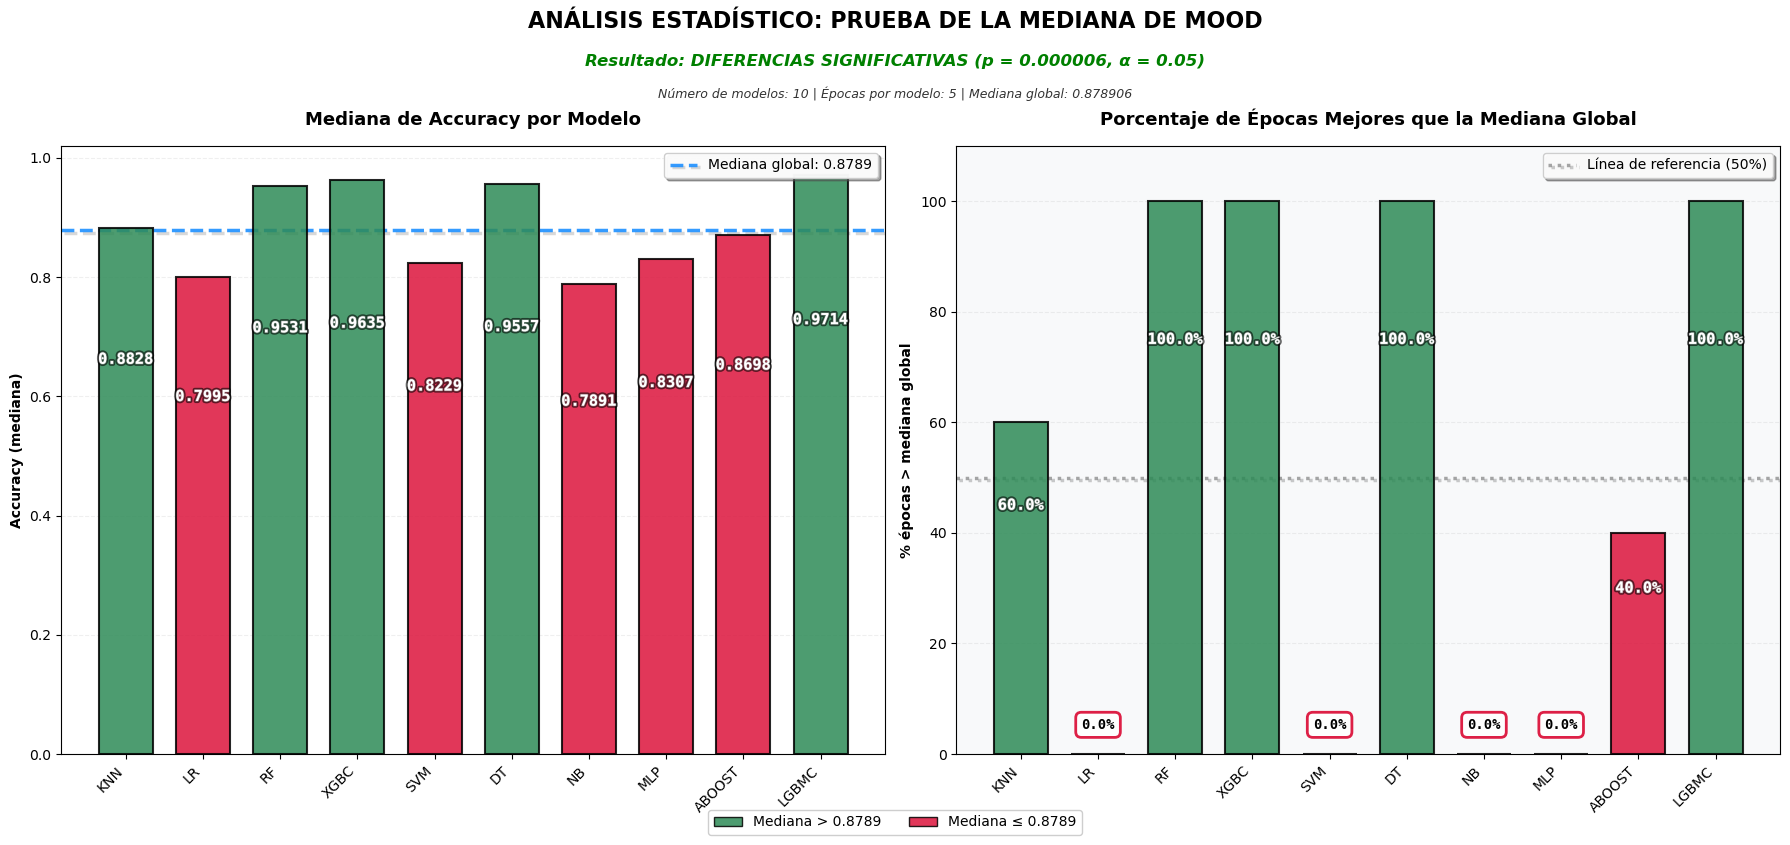


RESULTADOS DE LA PRUEBA:
Estadístico χ²: 41.9872
Valor p: 0.0000033043
Mediana global (umbral): 0.8526

CONCLUSIÓN ESTADÍSTICA (α = 0.05):
H₀: Todas las medianas de Recall son iguales.
H₁: Al menos una mediana difiere.
→ Dado que p = 0.000003 < α = 0.05, se rechaza H₀.
→ Existen diferencias estadísticamente significativas en las medianas de Recall entre los modelos.

MEDIANAS POR MODELO:
  KNN        0.832300 (MENOR o IGUAL que la mediana global)
  LR         0.645200 (MENOR o IGUAL que la mediana global)
  RF         0.929000 (MAYOR que la mediana global)
  XGBC       0.948400 (MAYOR que la mediana global)
  SVM        0.729000 (MENOR o IGUAL que la mediana global)
  DT         0.954800 (MAYOR que la mediana global)
  NB         0.638700 (MENOR o IGUAL que la mediana global)
  MLP        0.774200 (MENOR o IGUAL que la mediana global)
  ABOOST     0.858100 (MAYOR que la mediana global)
  LGBMC      0.948700 (MAYOR que la mediana global)

TABLA DE CONTINGENCIA (Prueba de Mood):
Filas: 

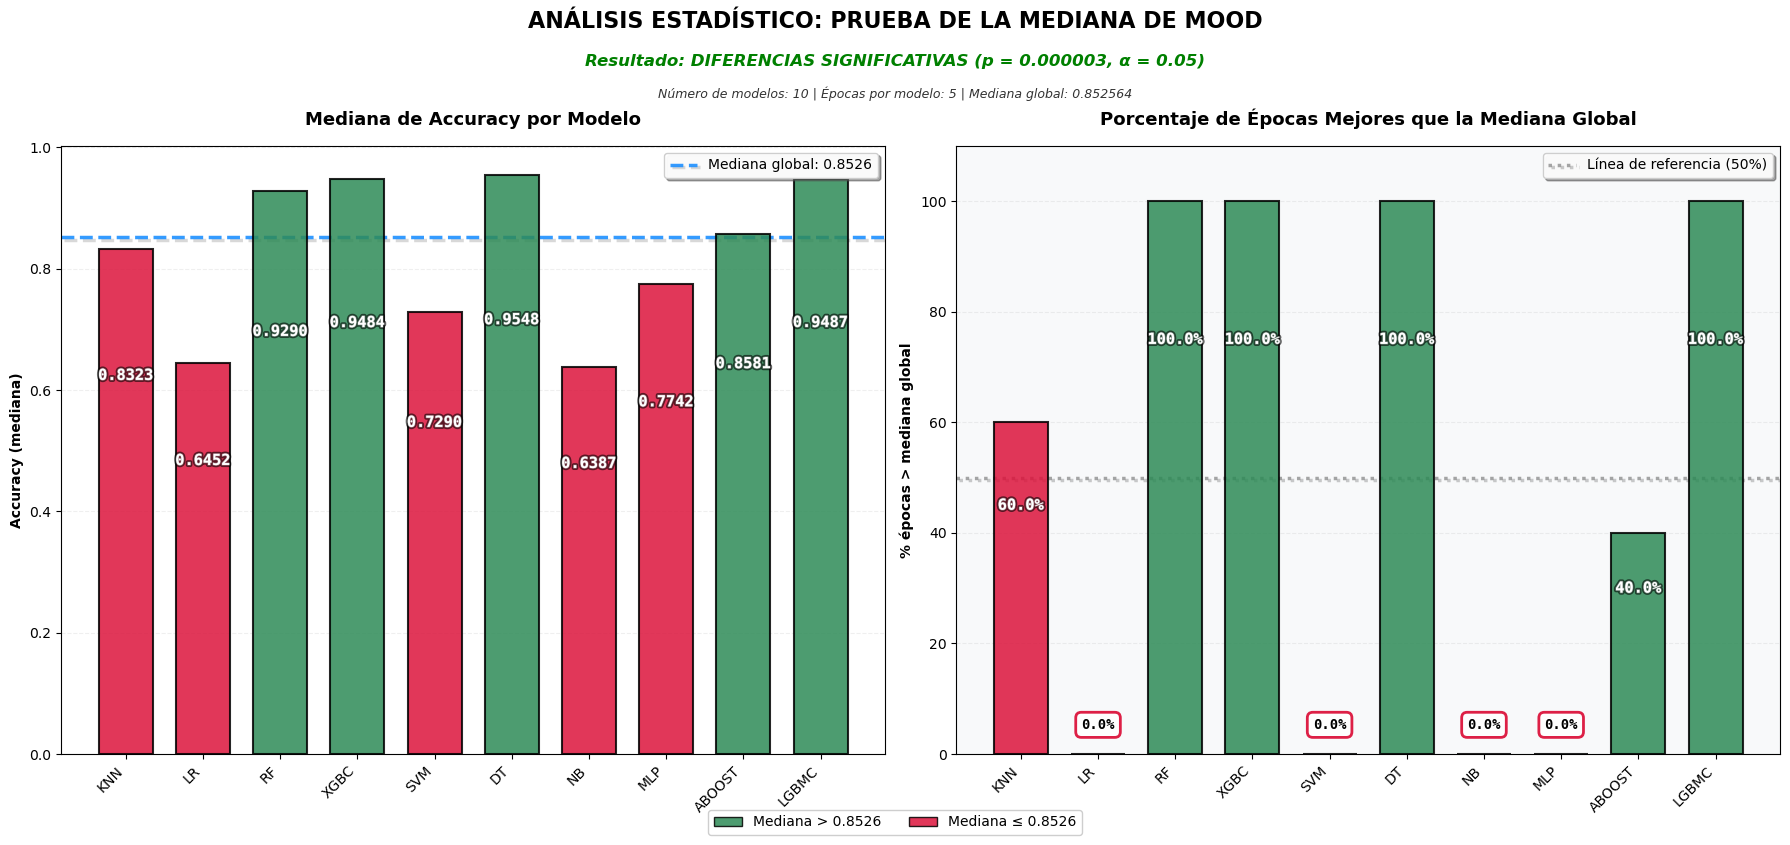


RESULTADOS DE LA PRUEBA:
Estadístico χ²: 40.4000
Valor p: 0.0000064297
Mediana global (umbral): 0.8477

CONCLUSIÓN ESTADÍSTICA (α = 0.05):
H₀: Todas las medianas de F1 son iguales.
H₁: Al menos una mediana difiere.
→ Dado que p = 0.000006 < α = 0.05, se rechaza H₀.
→ Existen diferencias estadísticamente significativas en las medianas de F1 entre los modelos.

MEDIANAS POR MODELO:
  KNN        0.855300 (MAYOR que la mediana global)
  LR         0.724600 (MENOR o IGUAL que la mediana global)
  RF         0.942300 (MAYOR que la mediana global)
  XGBC       0.953600 (MAYOR que la mediana global)
  SVM        0.766100 (MENOR o IGUAL que la mediana global)
  DT         0.945300 (MAYOR que la mediana global)
  NB         0.711700 (MENOR o IGUAL que la mediana global)
  MLP        0.792300 (MENOR o IGUAL que la mediana global)
  ABOOST     0.841800 (MENOR o IGUAL que la mediana global)
  LGBMC      0.964400 (MAYOR que la mediana global)

TABLA DE CONTINGENCIA (Prueba de Mood):
Filas: [arriba 

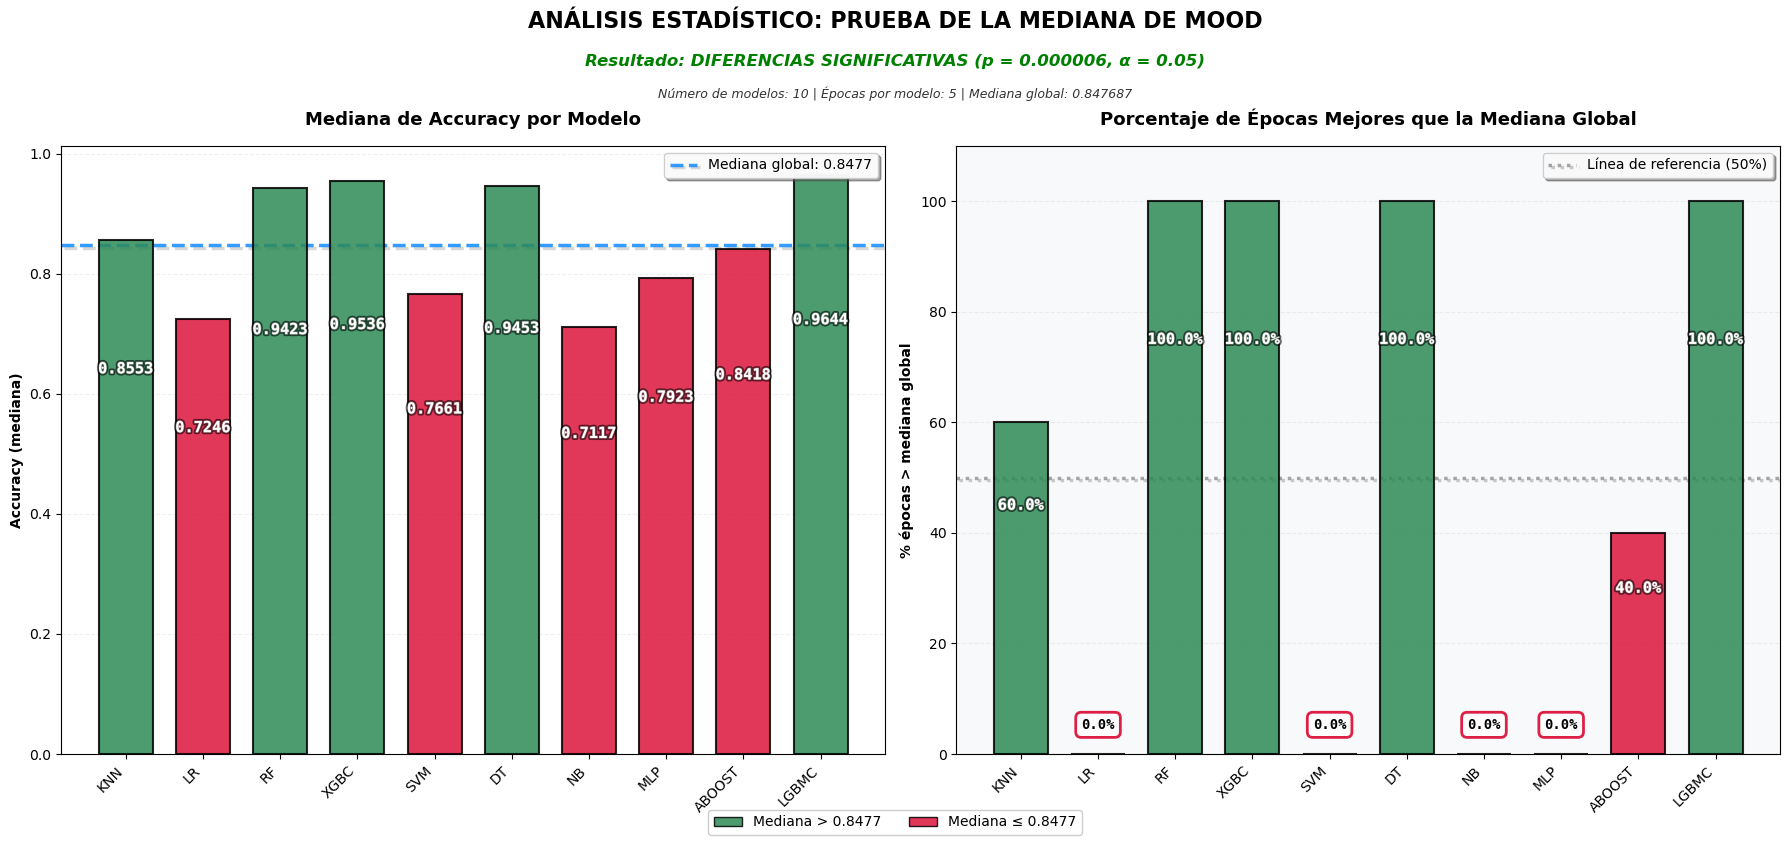

In [121]:
modelos = ['KNN', 'LR', 'RF', 'XGBC', 'SVM', 'DT', 'NB', 'MLP', 'ABOOST', 'LGBMC']
dfs = {
    'Accuracy' : df_accuracy,
    'Recall' : df_recall,
    'F1' : df_f1
}

for medida, df in dfs.items():
    values = [df[modelo].values for modelo in modelos]


    stat, p_value, mediana_global, tabla_contingencia = stats.median_test(*values)
    print(f"\nRESULTADOS DE LA PRUEBA:")
    print(f"Estadístico χ²: {stat:.4f}")
    print(f"Valor p: {p_value:.10f}")
    print(f"Mediana global (umbral): {mediana_global:.4f}")

    # Después de imprimir el valor p:

    alpha = 0.05
    print(f"\nCONCLUSIÓN ESTADÍSTICA (α = {alpha}):")
    print(f"H₀: Todas las medianas de {medida} son iguales.")
    print(f"H₁: Al menos una mediana difiere.")

    if p_value < alpha:
        print(f"→ Dado que p = {p_value:.6f} < α = {alpha}, se rechaza H₀.")
        print(f"→ Existen diferencias estadísticamente significativas en las medianas de {medida} entre los modelos.")
    else:
        print(f"→ Dado que p = {p_value:.6f} ≥ α = {alpha}, no se rechaza H₀.")
        print(f"→ No hay evidencia suficiente para afirmar diferencias en las medianas de {medida}.")

    medianas = [np.round(np.median(val), 4) for val in values]

    print(f"\nMEDIANAS POR MODELO:")
    for name, mediana in zip(modelos, medianas):
        posicion = "MAYOR" if mediana > mediana_global else "MENOR o IGUAL"
        print(f"  {name:<10} {mediana:.6f} ({posicion} que la mediana global)")

    print(f"\nTABLA DE CONTINGENCIA (Prueba de Mood):")
    print("Filas: [arriba de la mediana global, abajo o igual a la mediana global]")
    print("Columnas: cada modelo")
    print("-" * 73)

    contingency_df = pd.DataFrame(
        tabla_contingencia,
        index=['Arriba de mediana', 'Abajo/Igual a mediana'],
        columns=modelos
    )

    print(contingency_df)

    print(f"\nPORCENTAJES (observaciones > mediana global):")
    for i, model in enumerate(modelos):
        total = len(values[i])
        arriba = tabla_contingencia[0, i]
        porcentaje = (arriba / total) * 100 if total > 0 else 0
        print(f"  {model:<10} {arriba}/{total} ({porcentaje:.1f}%)")

    ################### Gráfica ###################
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 8))

    x_pos = np.arange(len(modelos))
    colors = ['#2E8B57' if m > mediana_global else '#DC143C' for m in medianas]  

    bars1 = ax1.bar(x_pos, medianas, color=colors, alpha=0.85, 
                    edgecolor='black', linewidth=1.5, 
                    width=0.7, zorder=3)

    ax1.axhline(y=mediana_global, color='#1E90FF', linestyle='--', 
                linewidth=2.5, alpha=0.9, label=f'Mediana global: {mediana_global:.4f}',
                path_effects=[path_effects.SimpleLineShadow(shadow_color='gray', alpha=0.3),
                            path_effects.Normal()])

    ax1.set_xticks(x_pos)
    ax1.set_xticklabels(modelos, rotation=45, ha='right', fontweight='medium')
    ax1.set_ylabel('Accuracy (mediana)', fontweight='bold')
    ax1.set_title('Mediana de Accuracy por Modelo', fontweight='bold', fontsize=13, pad=15)
    ax1.legend(loc='upper right', framealpha=0.95, shadow=True, fancybox=True)
    ax1.grid(True, alpha=0.2, axis='y', linestyle='--', zorder=0)
    ax1.set_axisbelow(True)

    for i, (bar, med) in enumerate(zip(bars1, medianas)):
        y_pos = bar.get_height() * 0.75
        
        ax1.text(bar.get_x() + bar.get_width()/2., y_pos,
                f'{med:.4f}', 
                ha='center', va='center', 
                fontsize=11, color='white', fontweight='bold',
                fontfamily='monospace',
                path_effects=[
                    path_effects.Stroke(linewidth=3, foreground='black', alpha=0.6),
                    path_effects.Stroke(linewidth=1, foreground='white', alpha=0.3),
                    path_effects.Normal()
                ])

    ax2.set_facecolor('#f8f9fa')  
    bars2 = ax2.bar(x_pos, porcentajes, color=colors, alpha=0.85,
                    edgecolor='black', linewidth=1.5, 
                    width=0.7, zorder=3)

    ax2.set_xticks(x_pos)
    ax2.set_xticklabels(modelos, rotation=45, ha='right', fontweight='medium')
    ax2.set_ylabel('% épocas > mediana global', fontweight='bold')
    ax2.set_title('Porcentaje de Épocas Mejores que la Mediana Global', 
                fontweight='bold', fontsize=13, pad=15)
    ax2.set_ylim(0, 110) 
    ax2.axhline(y=50, color='gray', linestyle=':', alpha=0.7, 
                linewidth=2.5, label='Línea de referencia (50%)',
                path_effects=[path_effects.SimpleLineShadow(shadow_color='black', alpha=0.2),
                            path_effects.Normal()])
    ax2.legend(loc='upper right', framealpha=0.95, shadow=True, fancybox=True)
    ax2.grid(True, alpha=0.2, axis='y', linestyle='--', zorder=0)
    ax2.set_axisbelow(True)

    for i, (bar, pct) in enumerate(zip(bars2, porcentajes)):
        if pct > 15:  
            y_pos = bar.get_height() * 0.75
            va = 'center'
            
            ax2.text(bar.get_x() + bar.get_width()/2., y_pos,
                    f'{pct:.1f}%', 
                    ha='center', va=va, 
                    fontsize=11, color='white', fontweight='bold',
                    fontfamily='monospace',
                    path_effects=[
                        path_effects.Stroke(linewidth=3, foreground='black', alpha=0.6),
                        path_effects.Stroke(linewidth=1, foreground='white', alpha=0.3),
                        path_effects.Normal()
                    ])
        else: 
            y_pos = bar.get_height() + 4
            va = 'bottom'
            
            ax2.text(bar.get_x() + bar.get_width()/2., y_pos,
                    f'{pct:.1f}%', 
                    ha='center', va=va, 
                    fontsize=10, color='black', fontweight='bold',
                    fontfamily='monospace',
                    bbox=dict(boxstyle='round,pad=0.4', 
                            facecolor='white', 
                            edgecolor=colors[i], 
                            linewidth=2,
                            alpha=0.95))

    fig.suptitle('ANÁLISIS ESTADÍSTICO: PRUEBA DE LA MEDIANA DE MOOD', 
                fontsize=16, fontweight='bold', y=1.05)

    subtitle_text = f'Resultado: {"DIFERENCIAS SIGNIFICATIVAS" if p_value < 0.05 else "SIN DIFERENCIAS SIGNIFICATIVAS"} '
    subtitle_text += f'(p = {p_value:.6f}, α = 0.05)'

    fig.text(0.5, 0.98, subtitle_text,
            ha='center', fontsize=12, 
            color='green' if p_value < 0.05 else 'red',
            fontweight='bold', style='italic')

    legend_elements = [
        plt.Rectangle((0, 0), 1, 1, facecolor='#2E8B57', alpha=0.85, 
                    edgecolor='black', linewidth=1, label=f'Mediana > {mediana_global:.4f}'),
        plt.Rectangle((0, 0), 1, 1, facecolor='#DC143C', alpha=0.85, 
                    edgecolor='black', linewidth=1, label=f'Mediana ≤ {mediana_global:.4f}')
    ]

    fig.legend(handles=legend_elements, loc='lower center', 
            ncol=2, fontsize=10, framealpha=0.95, 
            bbox_to_anchor=(0.5, 0.01))

    info_text = f'Número de modelos: {len(modelos)} | Épocas por modelo: {len(values[0])} | Mediana global: {mediana_global:.6f}'
    fig.text(0.5, 0.94, info_text,
            ha='center', fontsize=9, alpha=0.8, style='italic')

    plt.tight_layout()
    plt.subplots_adjust(top=0.88, bottom=0.12) 
    plt.show()

### Test Signos


PRUEBA DE LOS SIGNOS - ACCURACY
Mediana global de referencia: 0.878906

COMPARACIÓN CON LA MEDIANA GLOBAL:
--------------------------------------------------
KNN       :   3 épocas > mediana,   2 épocas < mediana,   0 épocas = mediana
LR        :   0 épocas > mediana,   5 épocas < mediana,   0 épocas = mediana
RF        :   5 épocas > mediana,   0 épocas < mediana,   0 épocas = mediana
XGBC      :   5 épocas > mediana,   0 épocas < mediana,   0 épocas = mediana
SVM       :   0 épocas > mediana,   5 épocas < mediana,   0 épocas = mediana
DT        :   5 épocas > mediana,   0 épocas < mediana,   0 épocas = mediana
NB        :   0 épocas > mediana,   5 épocas < mediana,   0 épocas = mediana
MLP       :   0 épocas > mediana,   5 épocas < mediana,   0 épocas = mediana
ABOOST    :   2 épocas > mediana,   3 épocas < mediana,   0 épocas = mediana
LGBMC     :   5 épocas > mediana,   0 épocas < mediana,   0 épocas = mediana

PRUEBA DE LOS SIGNOS (Sign Test) - Resultados por modelo

KNN:
  • Épo

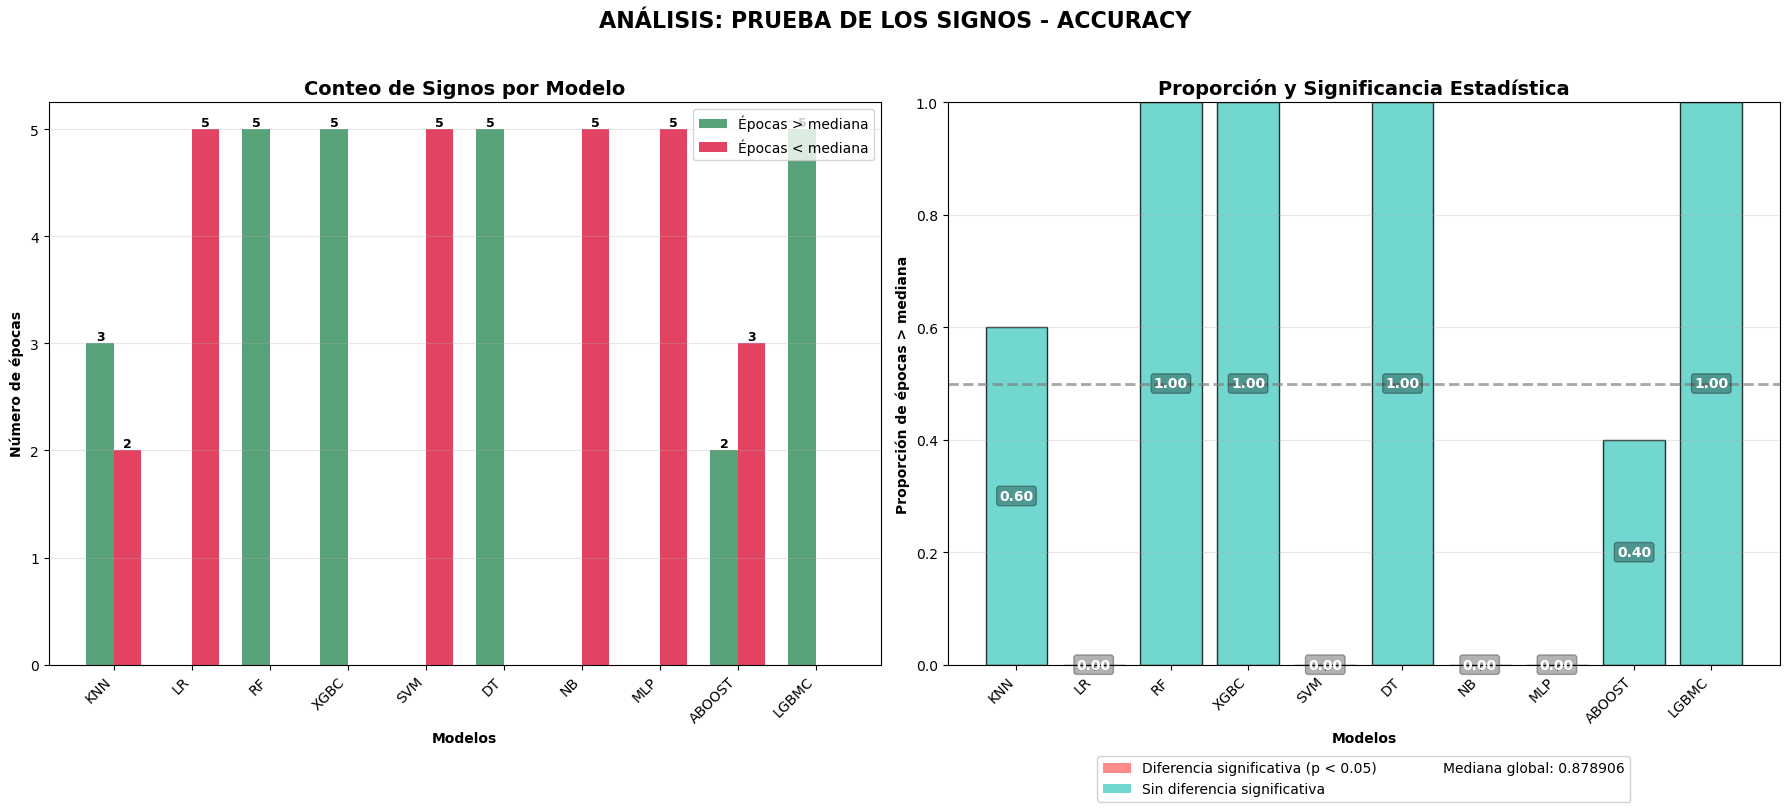


PRUEBA DE LOS SIGNOS - RECALL
Mediana global de referencia: 0.852564

COMPARACIÓN CON LA MEDIANA GLOBAL:
--------------------------------------------------
KNN       :   1 épocas > mediana,   3 épocas < mediana,   1 épocas = mediana
LR        :   0 épocas > mediana,   5 épocas < mediana,   0 épocas = mediana
RF        :   5 épocas > mediana,   0 épocas < mediana,   0 épocas = mediana
XGBC      :   5 épocas > mediana,   0 épocas < mediana,   0 épocas = mediana
SVM       :   0 épocas > mediana,   5 épocas < mediana,   0 épocas = mediana
DT        :   5 épocas > mediana,   0 épocas < mediana,   0 épocas = mediana
NB        :   0 épocas > mediana,   5 épocas < mediana,   0 épocas = mediana
MLP       :   0 épocas > mediana,   5 épocas < mediana,   0 épocas = mediana
ABOOST    :   3 épocas > mediana,   1 épocas < mediana,   1 épocas = mediana
LGBMC     :   5 épocas > mediana,   0 épocas < mediana,   0 épocas = mediana

PRUEBA DE LOS SIGNOS (Sign Test) - Resultados por modelo

KNN:
  • Época

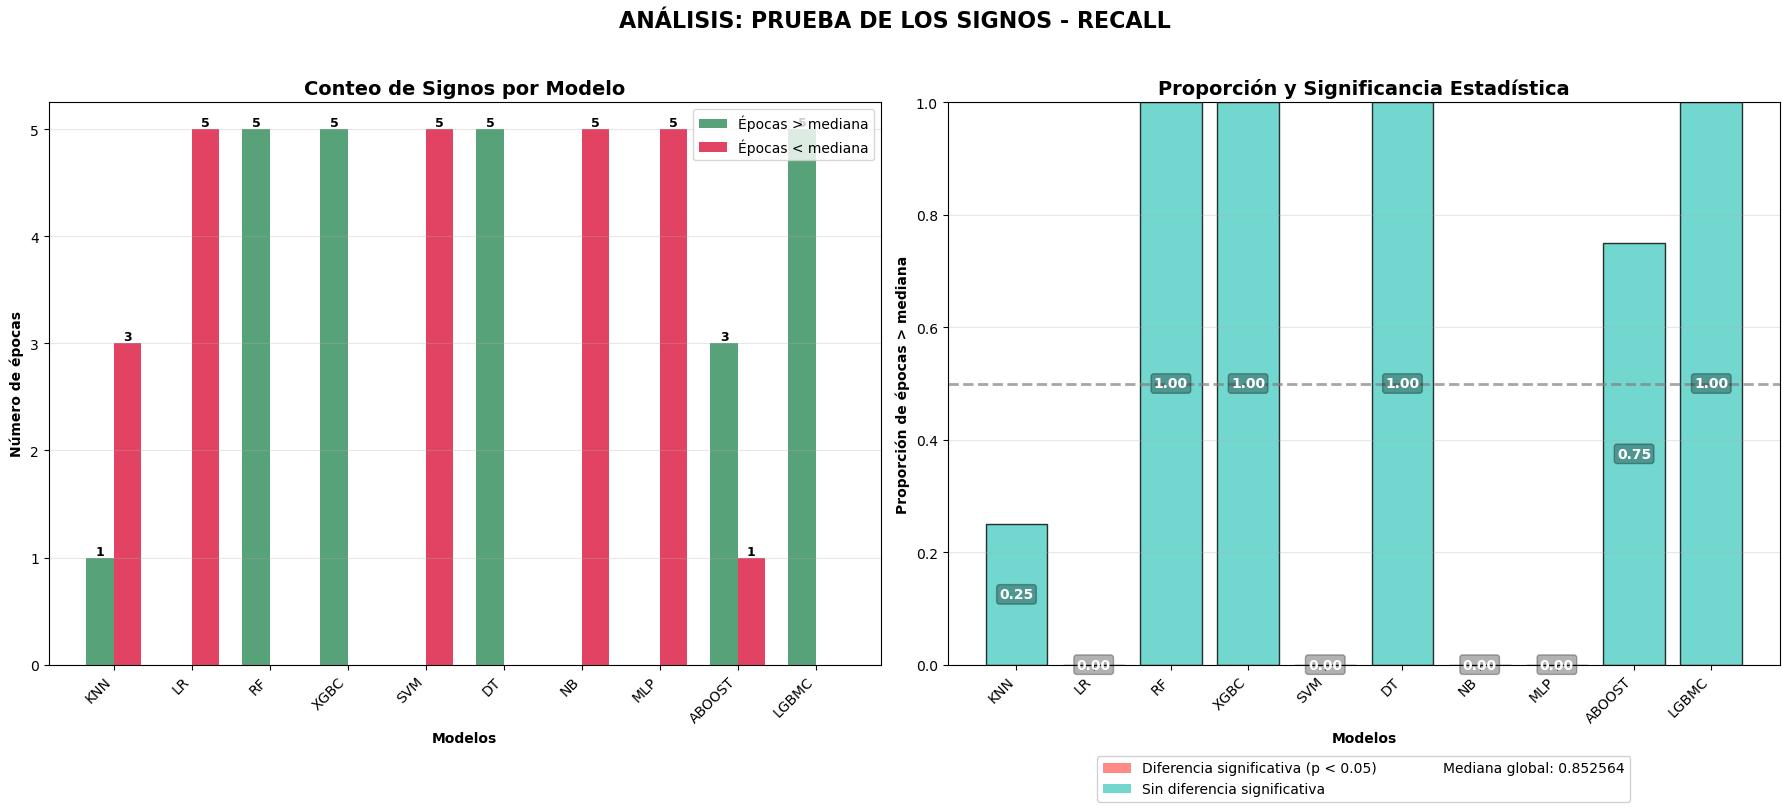


PRUEBA DE LOS SIGNOS - F1
Mediana global de referencia: 0.847687

COMPARACIÓN CON LA MEDIANA GLOBAL:
--------------------------------------------------
KNN       :   3 épocas > mediana,   2 épocas < mediana,   0 épocas = mediana
LR        :   0 épocas > mediana,   5 épocas < mediana,   0 épocas = mediana
RF        :   5 épocas > mediana,   0 épocas < mediana,   0 épocas = mediana
XGBC      :   5 épocas > mediana,   0 épocas < mediana,   0 épocas = mediana
SVM       :   0 épocas > mediana,   5 épocas < mediana,   0 épocas = mediana
DT        :   5 épocas > mediana,   0 épocas < mediana,   0 épocas = mediana
NB        :   0 épocas > mediana,   5 épocas < mediana,   0 épocas = mediana
MLP       :   0 épocas > mediana,   5 épocas < mediana,   0 épocas = mediana
ABOOST    :   2 épocas > mediana,   3 épocas < mediana,   0 épocas = mediana
LGBMC     :   5 épocas > mediana,   0 épocas < mediana,   0 épocas = mediana

PRUEBA DE LOS SIGNOS (Sign Test) - Resultados por modelo

KNN:
  • Épocas > 

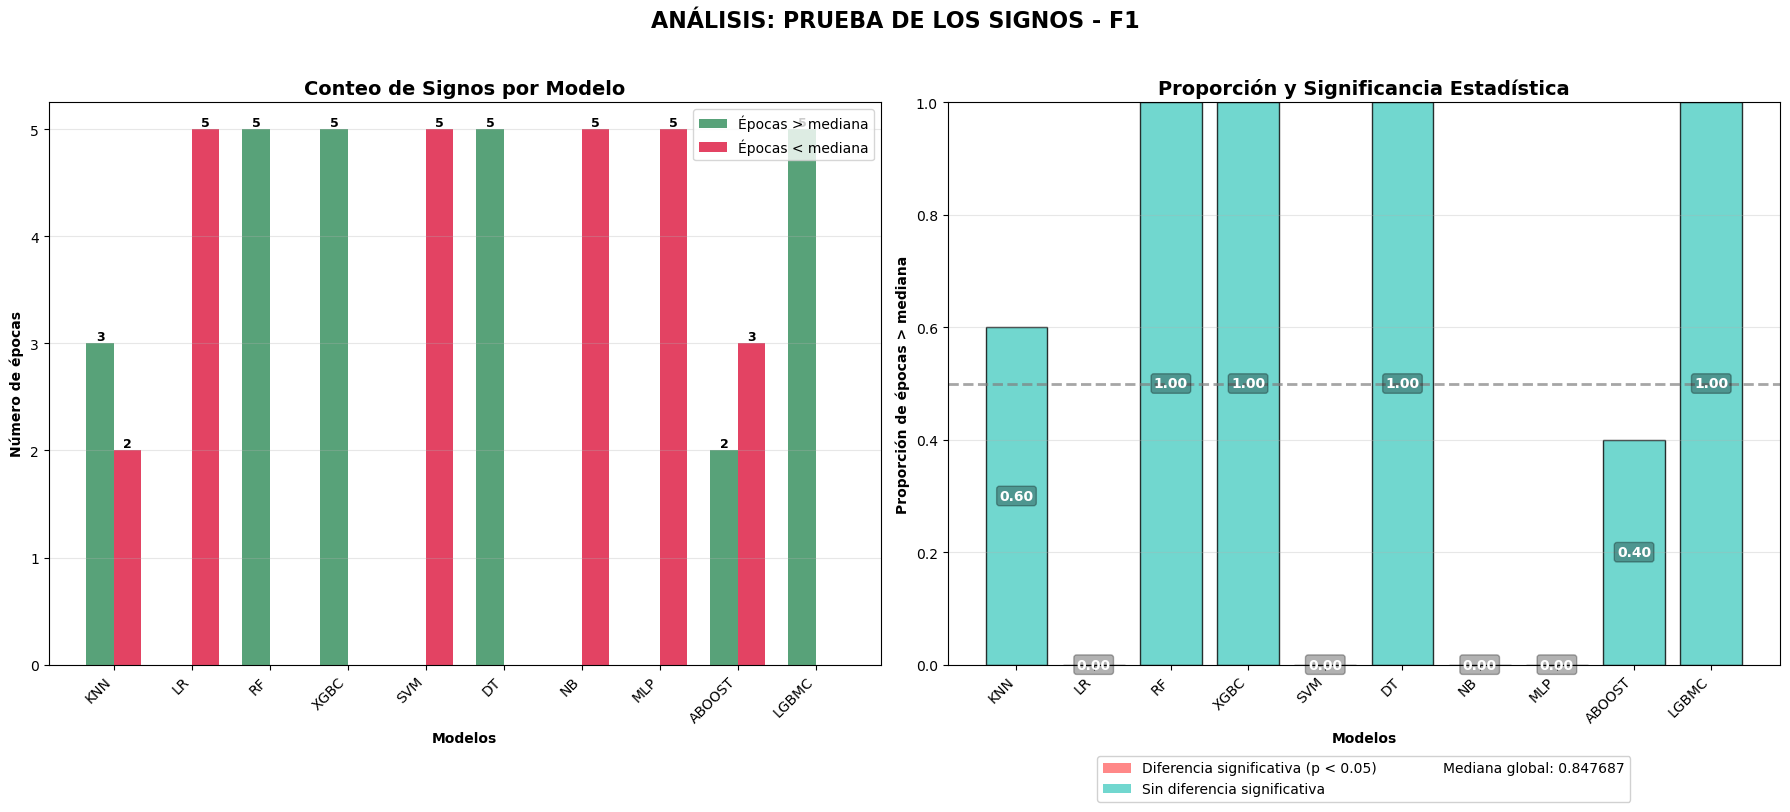

In [125]:
for medida, df in dfs.items():
    values = [df[modelo].values for modelo in modelos]
    
    # Realizar comparaciones por pares con la mediana global
    # Para la prueba de signos, comparamos cada observación con la mediana global
    print(f"\n{'='*70}")
    print(f"PRUEBA DE LOS SIGNOS - {medida.upper()}")
    print(f"{'='*70}")
    
    # Calcular mediana global
    mediana_global = np.median(np.concatenate(values))
    print(f"Mediana global de referencia: {mediana_global:.6f}")
    
    # Preparar datos para la prueba de signos
    signos_por_modelo = []
    conteos_por_modelo = []
    
    print(f"\nCOMPARACIÓN CON LA MEDIANA GLOBAL:")
    print("-" * 50)
    
    for i, (modelo, datos) in enumerate(zip(modelos, values)):
        # Contar signos (+, -, =)
        positivos = np.sum(datos > mediana_global)
        negativos = np.sum(datos < mediana_global)
        iguales = np.sum(datos == mediana_global)
        
        signos_por_modelo.append({'+': positivos, '-': negativos, '=': iguales})
        conteos_por_modelo.append((positivos, negativos))
        
        print(f"{modelo:<10}: {positivos:>3} épocas > mediana, {negativos:>3} épocas < mediana, {iguales:>3} épocas = mediana")
    
    print(f"\n{'='*70}")
    print("PRUEBA DE LOS SIGNOS (Sign Test) - Resultados por modelo")
    print(f"{'='*70}")
    
    for i, (modelo, datos) in enumerate(zip(modelos, values)):
        positivos, negativos = conteos_por_modelo[i]
        n_no_cero = positivos + negativos  # Excluyendo empates
        
        if n_no_cero > 0:
            # Realizar prueba binomial (test de signos)
            from scipy.stats import binomtest
            
            # La prueba binomial compara si hay igual proporción de + y -
            # H0: p = 0.5 (igual probabilidad de ser mayor o menor)
            resultado = binomtest(min(positivos, negativos), n_no_cero, p=0.5, alternative='two-sided')
            
            p_valor = resultado.pvalue
            
            print(f"\n{modelo}:")
            print(f"  • Épocas > mediana: {positivos}")
            print(f"  • Épocas < mediana: {negativos}")
            print(f"  • Épocas = mediana: {signos_por_modelo[i]['=']}")
            print(f"  • Total no-empates (n): {n_no_cero}")
            print(f"  • Proporción > mediana: {positivos/n_no_cero:.3f}" if n_no_cero > 0 else "  • Proporción: N/A")
            print(f"  • Estadístico (k): {min(positivos, negativos)}")
            print(f"  • Valor p (dos colas): {p_valor:.6f}")
            
            # Interpretación
            alpha = 0.05
            if positivos > negativos:
                tendencia = "MAYOR a la mediana global"
            elif positivos < negativos:
                tendencia = "MENOR a la mediana global"
            else:
                tendencia = "IGUAL a la mediana global"
            
            print(f"  • Tendencia: {tendencia}")
            
            if p_valor < alpha:
                print(f"  • CONCLUSIÓN: Diferencia SIGNIFICATIVA (p < {alpha})")
                print(f"    → El modelo tiene un desempeño {tendencia.lower()} de manera estadísticamente significativa")
            else:
                print(f"  • CONCLUSIÓN: Sin diferencia significativa (p ≥ {alpha})")
                print(f"    → No hay evidencia suficiente para afirmar que el modelo difiere de la mediana global")
            
            # Estimar el efecto
            if n_no_cero >= 10:  # Solo para muestras razonablemente grandes
                proporcion = positivos / n_no_cero
                print(f"  • Efecto estimado: {proporcion:.1%} de épocas superan la mediana")
        
        else:
            print(f"\n{modelo}: Todos los valores son iguales a la mediana global")
    
    print(f"\n{'='*70}")
    print("RESUMEN GENERAL DE LA PRUEBA DE SIGNOS")
    print(f"{'='*70}")
    
    # Contar cuántos modelos muestran diferencias significativas
    modelos_significativos = []
    modelos_no_significativos = []
    
    for i, (modelo, datos) in enumerate(zip(modelos, values)):
        positivos, negativos = conteos_por_modelo[i]
        n_no_cero = positivos + negativos
        
        if n_no_cero > 0:
            resultado = binomtest(min(positivos, negativos), n_no_cero, p=0.5, alternative='two-sided')
            p_valor = resultado.pvalue
            
            if p_valor < 0.05:
                if positivos > negativos:
                    modelos_significativos.append((modelo, "superior"))
                else:
                    modelos_significativos.append((modelo, "inferior"))
            else:
                modelos_no_significativos.append(modelo)
    
    print(f"\nModelos con desempeño SIGNIFICATIVAMENTE diferente a la mediana global:")
    if modelos_significativos:
        for modelo, direccion in modelos_significativos:
            print(f"  • {modelo}: {direccion}")
    else:
        print("  Ningún modelo muestra diferencias significativas")
    
    print(f"\nModelos SIN diferencia significativa:")
    if modelos_no_significativos:
        for modelo in modelos_no_significativos:
            print(f"  • {modelo}")
    else:
        print("  Todos los modelos muestran diferencias significativas")
    
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 8))
    
    x_pos = np.arange(len(modelos))
    ancho_barra = 0.35
    
    positivos_arr = [s['+'] for s in signos_por_modelo]
    negativos_arr = [s['-'] for s in signos_por_modelo]
    
    bars_pos = ax1.bar(x_pos - ancho_barra/2, positivos_arr, ancho_barra, 
                      label='Épocas > mediana', color='#2E8B57', alpha=0.8)
    bars_neg = ax1.bar(x_pos + ancho_barra/2, negativos_arr, ancho_barra, 
                      label='Épocas < mediana', color='#DC143C', alpha=0.8)
    
    ax1.set_xlabel('Modelos', fontweight='bold')
    ax1.set_ylabel('Número de épocas', fontweight='bold')
    ax1.set_title('Conteo de Signos por Modelo', fontweight='bold', fontsize=14)
    ax1.set_xticks(x_pos)
    ax1.set_xticklabels(modelos, rotation=45, ha='right')
    ax1.legend()
    ax1.grid(True, alpha=0.3, axis='y')
    
    for bar in bars_pos:
        height = bar.get_height()
        if height > 0:
            ax1.text(bar.get_x() + bar.get_width()/2., height,
                    f'{int(height)}', ha='center', va='bottom', 
                    fontweight='bold', fontsize=9)
    
    for bar in bars_neg:
        height = bar.get_height()
        if height > 0:
            ax1.text(bar.get_x() + bar.get_width()/2., height,
                    f'{int(height)}', ha='center', va='bottom', 
                    fontweight='bold', fontsize=9)
    proporcion_mayor = []
    p_values = []
    
    for i, (modelo, datos) in enumerate(zip(modelos, values)):
        positivos, negativos = conteos_por_modelo[i]
        n_no_cero = positivos + negativos
        
        if n_no_cero > 0:
            resultado = binomtest(min(positivos, negativos), n_no_cero, p=0.5, alternative='two-sided')
            proporcion = positivos / n_no_cero
        else:
            proporcion = 0.5  
        
        proporcion_mayor.append(proporcion)
        
        if n_no_cero > 0:
            p_values.append(resultado.pvalue)
        else:
            p_values.append(1.0)  
    
    colors_bars = []
    for p_val in p_values:
        if p_val < 0.05:
            colors_bars.append('#FF6B6B')  
        else:
            colors_bars.append('#4ECDC4')  
    
    bars2 = ax2.bar(x_pos, proporcion_mayor, color=colors_bars, alpha=0.8, edgecolor='black')
    ax2.axhline(y=0.5, color='gray', linestyle='--', linewidth=2, alpha=0.7, 
                label='Proporción esperada (50%)')
    
    ax2.set_xlabel('Modelos', fontweight='bold')
    ax2.set_ylabel('Proporción de épocas > mediana', fontweight='bold')
    ax2.set_title('Proporción y Significancia Estadística', fontweight='bold', fontsize=14)
    ax2.set_xticks(x_pos)
    ax2.set_xticklabels(modelos, rotation=45, ha='right')
    ax2.set_ylim(0, 1)
    ax2.legend()
    ax2.grid(True, alpha=0.3, axis='y')
    
    for i, (bar, p_val) in enumerate(zip(bars2, p_values)):
        height = bar.get_height()
        if p_val < 0.05:
            simbolo = '***' if p_val < 0.001 else '**' if p_val < 0.01 else '*'
            ax2.text(bar.get_x() + bar.get_width()/2., height + 0.02,
                    simbolo, ha='center', va='bottom', 
                    fontweight='bold', fontsize=12, color='red')
    
    for bar, prop in zip(bars2, proporcion_mayor):
        height = bar.get_height()
        ax2.text(bar.get_x() + bar.get_width()/2., height/2,
                f'{prop:.2f}', ha='center', va='center', 
                fontweight='bold', fontsize=10, color='white',
                bbox=dict(boxstyle='round,pad=0.2', facecolor='black', alpha=0.3))
    
    fig.suptitle(f'ANÁLISIS: PRUEBA DE LOS SIGNOS - {medida.upper()}', 
                fontsize=16, fontweight='bold', y=1.02)
    
    from matplotlib.patches import Patch
    legend_elements = [
        Patch(facecolor='#FF6B6B', alpha=0.8, label='Diferencia significativa (p < 0.05)'),
        Patch(facecolor='#4ECDC4', alpha=0.8, label='Sin diferencia significativa'),
        Patch(facecolor='white', alpha=0, label=f'Mediana global: {mediana_global:.6f}')
    ]
    
    ax2.legend(handles=legend_elements, loc='upper center', 
              bbox_to_anchor=(0.5, -0.15), ncol=2, framealpha=0.9)
    
    plt.tight_layout()
    plt.show()